In [1]:
import torch

In [2]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)#pytoh数组转成pytorch-tensor
t_u = torch.tensor(t_u)

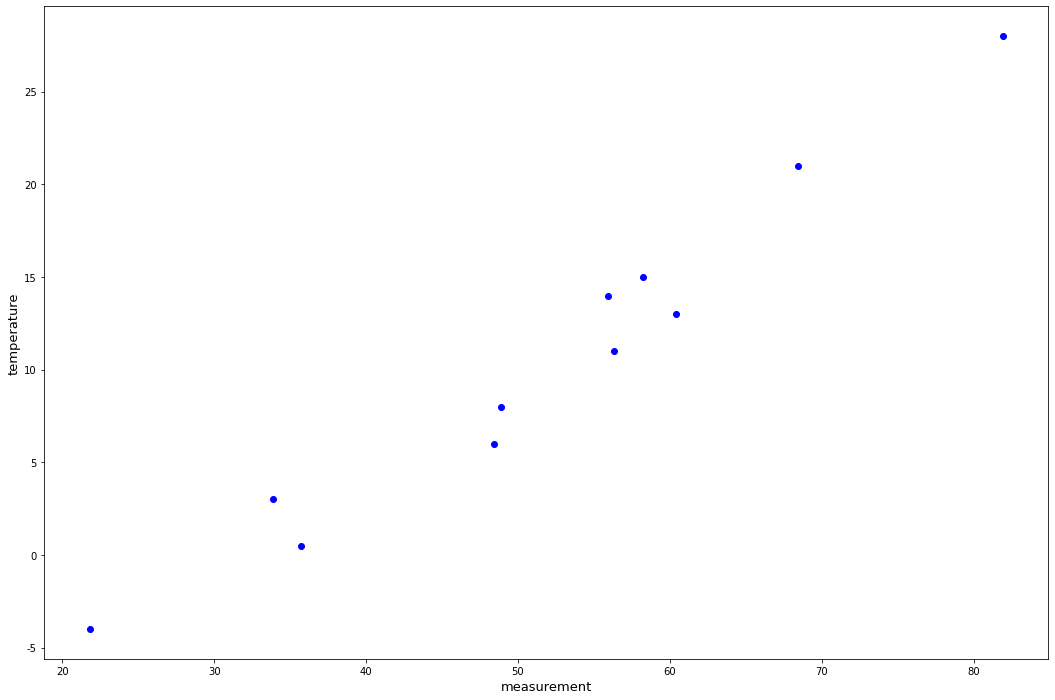

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
plt.scatter(t_u, t_c,color='b') ##可以用来观察存在线型的关系
plt.xlabel("measurement", fontsize=13)
plt.ylabel("temperature", fontsize=13)

plt.show()

In [4]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [5]:
w = torch.ones(())
b = torch.zeros(())

t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [6]:
loss = loss_fn(t_p,t_c)
loss

tensor(1763.8848)

In [7]:
# 数值梯度计算
delta = 0.1
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) -
    loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [8]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [9]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) -
    loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [10]:
# 梯度下降解析解
def dloss_fn(t_p, t_c):
    dsq_diffs=2* (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [11]:
# 定义每次train的迭代
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c) #forward
        grad = grad_fn(t_u, t_c, t_p, w, b) #backward
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        print(f'       Params: ',params)
        print(f'       Grad: ',grad)
    
    return params

In [12]:
# 观察blow up现象
training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c)

Epoch 1, Loss 1763.884766
       Params:  tensor([-44.1730,  -0.8260])
       Grad:  tensor([4517.2964,   82.6000])
Epoch 2, Loss 5802484.500000
       Params:  tensor([2568.4011,   45.1637])
       Grad:  tensor([-261257.4062,   -4598.9702])
Epoch 3, Loss 19408029696.000000
       Params:  tensor([-148527.7344,   -2616.3931])
       Grad:  tensor([15109614.0000,   266155.6875])
Epoch 4, Loss 64915905708032.000000
       Params:  tensor([8589999.0000,  151310.8906])
       Grad:  tensor([-8.7385e+08, -1.5393e+07])
Epoch 5, Loss 217130525461053440.000000
       Params:  tensor([-4.9680e+08, -8.7510e+06])
       Grad:  tensor([5.0539e+10, 8.9023e+08])
Epoch 6, Loss 726257583152928129024.000000
       Params:  tensor([2.8732e+10, 5.0610e+08])
       Grad:  tensor([-2.9229e+12, -5.1486e+10])
Epoch 7, Loss 2429183416467662896627712.000000
       Params:  tensor([-1.6617e+12, -2.9270e+10])
       Grad:  tensor([1.6904e+14, 2.9776e+12])
Epoch 8, Loss 8125122549611731432050262016.000000
      

tensor([nan, nan])

In [13]:
# 调小learning_rate
training_loop(
    n_epochs = 100,
    learning_rate = 1e-4,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_u,
    t_c = t_c)

Epoch 1, Loss 1763.884766
       Params:  tensor([ 0.5483, -0.0083])
       Grad:  tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
       Params:  tensor([ 0.3623, -0.0118])
       Grad:  tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
       Params:  tensor([ 0.2858, -0.0135])
       Grad:  tensor([765.4666,  16.5122])
Epoch 4, Loss 37.552845
       Params:  tensor([ 0.2543, -0.0143])
       Grad:  tensor([315.0790,   8.5787])
Epoch 5, Loss 30.540283
       Params:  tensor([ 0.2413, -0.0149])
       Grad:  tensor([129.6733,   5.3127])
Epoch 6, Loss 29.351154
       Params:  tensor([ 0.2360, -0.0153])
       Grad:  tensor([53.3495,  3.9682])
Epoch 7, Loss 29.148884
       Params:  tensor([ 0.2338, -0.0156])
       Grad:  tensor([21.9304,  3.4148])
Epoch 8, Loss 29.113848
       Params:  tensor([ 0.2329, -0.0159])
       Grad:  tensor([8.9964, 3.1869])
Epoch 9, Loss 29.107145
       Params:  tensor([ 0.2325, -0.0162])
       Grad:  tensor([3.6721, 3.0930])
Epoch 10, Loss 

       Grad:  tensor([-0.0533,  3.0233])
Epoch 88, Loss 29.033636
       Params:  tensor([ 0.2327, -0.0401])
       Grad:  tensor([-0.0532,  3.0232])
Epoch 89, Loss 29.032722
       Params:  tensor([ 0.2327, -0.0405])
       Grad:  tensor([-0.0533,  3.0232])
Epoch 90, Loss 29.031811
       Params:  tensor([ 0.2327, -0.0408])
       Grad:  tensor([-0.0533,  3.0231])
Epoch 91, Loss 29.030895
       Params:  tensor([ 0.2327, -0.0411])
       Grad:  tensor([-0.0532,  3.0231])
Epoch 92, Loss 29.029976
       Params:  tensor([ 0.2327, -0.0414])
       Grad:  tensor([-0.0532,  3.0230])
Epoch 93, Loss 29.029066
       Params:  tensor([ 0.2327, -0.0417])
       Grad:  tensor([-0.0533,  3.0230])
Epoch 94, Loss 29.028151
       Params:  tensor([ 0.2327, -0.0420])
       Grad:  tensor([-0.0532,  3.0229])
Epoch 95, Loss 29.027235
       Params:  tensor([ 0.2327, -0.0423])
       Grad:  tensor([-0.0533,  3.0229])
Epoch 96, Loss 29.026323
       Params:  tensor([ 0.2327, -0.0426])
       Grad:  tenso

tensor([ 0.2327, -0.0438])

- Broadcasting广播机制

In [14]:
x = torch.ones(())
y = torch.ones(3,1)
z = torch.ones(1,3)
a = torch.ones(2, 1, 1)
print(f"shapes: x: {x.shape}, y: {y.shape}")
print(f" z: {z.shape}, a: {a.shape}")
print("x * y:", (x * y).shape)
print("y * z:", (y * z).shape)
print("y * z * a:", (y * z * a).shape)

shapes: x: torch.Size([]), y: torch.Size([3, 1])
 z: torch.Size([1, 3]), a: torch.Size([2, 1, 1])
x * y: torch.Size([3, 1])
y * z: torch.Size([3, 3])
y * z * a: torch.Size([2, 3, 3])


- end

In [15]:
# 5.4.4 Normalizing inputs输入标准化处理
t_un = 0.1 * t_u

In [16]:
training_loop(
    n_epochs = 100,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c)

Epoch 1, Loss 80.364342
       Params:  tensor([1.7761, 0.1064])
       Grad:  tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
       Params:  tensor([2.0848, 0.1303])
       Grad:  tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
       Params:  tensor([2.2094, 0.1217])
       Grad:  tensor([-12.4631,   0.8587])
Epoch 4, Loss 29.756193
       Params:  tensor([2.2616, 0.1004])
       Grad:  tensor([-5.2218,  2.1327])
Epoch 5, Loss 29.507153
       Params:  tensor([2.2853, 0.0740])
       Grad:  tensor([-2.3715,  2.6310])
Epoch 6, Loss 29.392456
       Params:  tensor([2.2978, 0.0458])
       Grad:  tensor([-1.2492,  2.8241])
Epoch 7, Loss 29.298828
       Params:  tensor([2.3059, 0.0168])
       Grad:  tensor([-0.8071,  2.8970])
Epoch 8, Loss 29.208717
       Params:  tensor([ 2.3122, -0.0124])
       Grad:  tensor([-0.6325,  2.9227])
Epoch 9, Loss 29.119415
       Params:  tensor([ 2.3178, -0.0417])
       Grad:  tensor([-0.5633,  2.9298])
Epoch 10, Loss 29.030489
       Para

Epoch 96, Loss 22.411934
       Params:  tensor([ 2.7374, -2.4153])
       Grad:  tensor([-0.4476,  2.5337])
Epoch 97, Loss 22.345793
       Params:  tensor([ 2.7419, -2.4406])
       Grad:  tensor([-0.4468,  2.5294])
Epoch 98, Loss 22.279875
       Params:  tensor([ 2.7464, -2.4658])
       Grad:  tensor([-0.4461,  2.5251])
Epoch 99, Loss 22.214186
       Params:  tensor([ 2.7508, -2.4910])
       Grad:  tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
       Params:  tensor([ 2.7553, -2.5162])
       Grad:  tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [17]:
# 增大epoch数
params = training_loop(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0]),
    t_u = t_un,
    t_c = t_c,
   )

Epoch 1, Loss 80.364342
       Params:  tensor([1.7761, 0.1064])
       Grad:  tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
       Params:  tensor([2.0848, 0.1303])
       Grad:  tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
       Params:  tensor([2.2094, 0.1217])
       Grad:  tensor([-12.4631,   0.8587])
Epoch 4, Loss 29.756193
       Params:  tensor([2.2616, 0.1004])
       Grad:  tensor([-5.2218,  2.1327])
Epoch 5, Loss 29.507153
       Params:  tensor([2.2853, 0.0740])
       Grad:  tensor([-2.3715,  2.6310])
Epoch 6, Loss 29.392456
       Params:  tensor([2.2978, 0.0458])
       Grad:  tensor([-1.2492,  2.8241])
Epoch 7, Loss 29.298828
       Params:  tensor([2.3059, 0.0168])
       Grad:  tensor([-0.8071,  2.8970])
Epoch 8, Loss 29.208717
       Params:  tensor([ 2.3122, -0.0124])
       Grad:  tensor([-0.6325,  2.9227])
Epoch 9, Loss 29.119415
       Params:  tensor([ 2.3178, -0.0417])
       Grad:  tensor([-0.5633,  2.9298])
Epoch 10, Loss 29.030489
       Para

       Params:  tensor([ 2.7105, -2.2626])
       Grad:  tensor([-0.4522,  2.5597])
Epoch 91, Loss 22.746044
       Params:  tensor([ 2.7150, -2.2882])
       Grad:  tensor([-0.4514,  2.5553])
Epoch 92, Loss 22.678766
       Params:  tensor([ 2.7195, -2.3137])
       Grad:  tensor([-0.4506,  2.5510])
Epoch 93, Loss 22.611717
       Params:  tensor([ 2.7240, -2.3392])
       Grad:  tensor([-0.4499,  2.5466])
Epoch 94, Loss 22.544899
       Params:  tensor([ 2.7285, -2.3646])
       Grad:  tensor([-0.4491,  2.5423])
Epoch 95, Loss 22.478306
       Params:  tensor([ 2.7330, -2.3900])
       Grad:  tensor([-0.4483,  2.5380])
Epoch 96, Loss 22.411934
       Params:  tensor([ 2.7374, -2.4153])
       Grad:  tensor([-0.4476,  2.5337])
Epoch 97, Loss 22.345793
       Params:  tensor([ 2.7419, -2.4406])
       Grad:  tensor([-0.4468,  2.5294])
Epoch 98, Loss 22.279875
       Params:  tensor([ 2.7464, -2.4658])
       Grad:  tensor([-0.4461,  2.5251])
Epoch 99, Loss 22.214186
       Params:  ten

       Params:  tensor([ 3.1824, -4.9341])
       Grad:  tensor([-0.3719,  2.1051])
Epoch 206, Loss 16.331776
       Params:  tensor([ 3.1861, -4.9551])
       Grad:  tensor([-0.3712,  2.1015])
Epoch 207, Loss 16.286276
       Params:  tensor([ 3.1898, -4.9760])
       Grad:  tensor([-0.3706,  2.0979])
Epoch 208, Loss 16.240929
       Params:  tensor([ 3.1935, -4.9970])
       Grad:  tensor([-0.3700,  2.0944])
Epoch 209, Loss 16.195732
       Params:  tensor([ 3.1972, -5.0179])
       Grad:  tensor([-0.3694,  2.0908])
Epoch 210, Loss 16.150694
       Params:  tensor([ 3.2009, -5.0388])
       Grad:  tensor([-0.3687,  2.0873])
Epoch 211, Loss 16.105806
       Params:  tensor([ 3.2046, -5.0596])
       Grad:  tensor([-0.3681,  2.0837])
Epoch 212, Loss 16.061073
       Params:  tensor([ 3.2082, -5.0804])
       Grad:  tensor([-0.3675,  2.0802])
Epoch 213, Loss 16.016487
       Params:  tensor([ 3.2119, -5.1012])
       Grad:  tensor([-0.3668,  2.0766])
Epoch 214, Loss 15.972058
       Par

       Grad:  tensor([-0.2976,  1.6848])
Epoch 337, Loss 11.513440
       Params:  tensor([ 3.6217, -7.4209])
       Grad:  tensor([-0.2971,  1.6819])
Epoch 338, Loss 11.484293
       Params:  tensor([ 3.6247, -7.4377])
       Grad:  tensor([-0.2966,  1.6790])
Epoch 339, Loss 11.455246
       Params:  tensor([ 3.6276, -7.4545])
       Grad:  tensor([-0.2961,  1.6762])
Epoch 340, Loss 11.426300
       Params:  tensor([ 3.6306, -7.4712])
       Grad:  tensor([-0.2956,  1.6733])
Epoch 341, Loss 11.397448
       Params:  tensor([ 3.6335, -7.4879])
       Grad:  tensor([-0.2951,  1.6705])
Epoch 342, Loss 11.368696
       Params:  tensor([ 3.6365, -7.5046])
       Grad:  tensor([-0.2946,  1.6677])
Epoch 343, Loss 11.340043
       Params:  tensor([ 3.6394, -7.5212])
       Grad:  tensor([-0.2941,  1.6648])
Epoch 344, Loss 11.311487
       Params:  tensor([ 3.6424, -7.5378])
       Grad:  tensor([-0.2936,  1.6620])
Epoch 345, Loss 11.283028
       Params:  tensor([ 3.6453, -7.5544])
       Gra

       Grad:  tensor([-0.2366,  1.3392])
Epoch 472, Loss 8.352828
       Params:  tensor([ 3.9798, -9.4480])
       Grad:  tensor([-0.2362,  1.3370])
Epoch 473, Loss 8.334409
       Params:  tensor([ 3.9822, -9.4614])
       Grad:  tensor([-0.2358,  1.3347])
Epoch 474, Loss 8.316054
       Params:  tensor([ 3.9845, -9.4747])
       Grad:  tensor([-0.2354,  1.3324])
Epoch 475, Loss 8.297764
       Params:  tensor([ 3.9869, -9.4880])
       Grad:  tensor([-0.2350,  1.3301])
Epoch 476, Loss 8.279534
       Params:  tensor([ 3.9892, -9.5013])
       Grad:  tensor([-0.2346,  1.3279])
Epoch 477, Loss 8.261369
       Params:  tensor([ 3.9915, -9.5145])
       Grad:  tensor([-0.2342,  1.3256])
Epoch 478, Loss 8.243259
       Params:  tensor([ 3.9939, -9.5277])
       Grad:  tensor([-0.2338,  1.3234])
Epoch 479, Loss 8.225213
       Params:  tensor([ 3.9962, -9.5410])
       Grad:  tensor([-0.2334,  1.3211])
Epoch 480, Loss 8.207231
       Params:  tensor([ 3.9985, -9.5541])
       Grad:  tenso

       Params:  tensor([  4.2531, -10.9953])
       Grad:  tensor([-0.1897,  1.0737])
Epoch 602, Loss 6.414490
       Params:  tensor([  4.2550, -11.0060])
       Grad:  tensor([-0.1893,  1.0718])
Epoch 603, Loss 6.402653
       Params:  tensor([  4.2569, -11.0167])
       Grad:  tensor([-0.1890,  1.0700])
Epoch 604, Loss 6.390859
       Params:  tensor([  4.2588, -11.0274])
       Grad:  tensor([-0.1887,  1.0682])
Epoch 605, Loss 6.379103
       Params:  tensor([  4.2607, -11.0381])
       Grad:  tensor([-0.1884,  1.0664])
Epoch 606, Loss 6.367385
       Params:  tensor([  4.2626, -11.0487])
       Grad:  tensor([-0.1880,  1.0646])
Epoch 607, Loss 6.355706
       Params:  tensor([  4.2644, -11.0594])
       Grad:  tensor([-0.1877,  1.0628])
Epoch 608, Loss 6.344070
       Params:  tensor([  4.2663, -11.0700])
       Grad:  tensor([-0.1874,  1.0609])
Epoch 609, Loss 6.332472
       Params:  tensor([  4.2682, -11.0806])
       Grad:  tensor([-0.1871,  1.0591])
Epoch 610, Loss 6.320912
 

       Grad:  tensor([-0.1508,  0.8535])
Epoch 737, Loss 5.130910
       Params:  tensor([  4.4832, -12.2979])
       Grad:  tensor([-0.1505,  0.8520])
Epoch 738, Loss 5.123428
       Params:  tensor([  4.4847, -12.3064])
       Grad:  tensor([-0.1502,  0.8506])
Epoch 739, Loss 5.115978
       Params:  tensor([  4.4862, -12.3149])
       Grad:  tensor([-0.1500,  0.8491])
Epoch 740, Loss 5.108547
       Params:  tensor([  4.4877, -12.3233])
       Grad:  tensor([-0.1497,  0.8477])
Epoch 741, Loss 5.101143
       Params:  tensor([  4.4892, -12.3318])
       Grad:  tensor([-0.1495,  0.8462])
Epoch 742, Loss 5.093765
       Params:  tensor([  4.4907, -12.3402])
       Grad:  tensor([-0.1492,  0.8448])
Epoch 743, Loss 5.086414
       Params:  tensor([  4.4922, -12.3487])
       Grad:  tensor([-0.1490,  0.8434])
Epoch 744, Loss 5.079086
       Params:  tensor([  4.4937, -12.3571])
       Grad:  tensor([-0.1487,  0.8419])
Epoch 745, Loss 5.071781
       Params:  tensor([  4.4952, -12.3655])
 

       Grad:  tensor([-0.1229,  0.6959])
Epoch 857, Loss 4.392697
       Params:  tensor([  4.6465, -13.2219])
       Grad:  tensor([-0.1227,  0.6948])
Epoch 858, Loss 4.387725
       Params:  tensor([  4.6477, -13.2289])
       Grad:  tensor([-0.1225,  0.6936])
Epoch 859, Loss 4.382770
       Params:  tensor([  4.6489, -13.2358])
       Grad:  tensor([-0.1223,  0.6924])
Epoch 860, Loss 4.377828
       Params:  tensor([  4.6501, -13.2427])
       Grad:  tensor([-0.1221,  0.6912])
Epoch 861, Loss 4.372905
       Params:  tensor([  4.6514, -13.2496])
       Grad:  tensor([-0.1219,  0.6901])
Epoch 862, Loss 4.368000
       Params:  tensor([  4.6526, -13.2565])
       Grad:  tensor([-0.1217,  0.6889])
Epoch 863, Loss 4.363111
       Params:  tensor([  4.6538, -13.2634])
       Grad:  tensor([-0.1215,  0.6877])
Epoch 864, Loss 4.358238
       Params:  tensor([  4.6550, -13.2702])
       Grad:  tensor([-0.1213,  0.6865])
Epoch 865, Loss 4.353383
       Params:  tensor([  4.6562, -13.2771])
 

Epoch 974, Loss 3.911815
       Params:  tensor([  4.7766, -13.9584])
       Grad:  tensor([-0.1006,  0.5694])
Epoch 975, Loss 3.908474
       Params:  tensor([  4.7776, -13.9641])
       Grad:  tensor([-0.1004,  0.5685])
Epoch 976, Loss 3.905143
       Params:  tensor([  4.7786, -13.9698])
       Grad:  tensor([-0.1003,  0.5675])
Epoch 977, Loss 3.901825
       Params:  tensor([  4.7796, -13.9755])
       Grad:  tensor([-0.1001,  0.5665])
Epoch 978, Loss 3.898517
       Params:  tensor([  4.7806, -13.9811])
       Grad:  tensor([-0.0999,  0.5656])
Epoch 979, Loss 3.895222
       Params:  tensor([  4.7816, -13.9868])
       Grad:  tensor([-0.0997,  0.5646])
Epoch 980, Loss 3.891935
       Params:  tensor([  4.7826, -13.9924])
       Grad:  tensor([-0.0996,  0.5637])
Epoch 981, Loss 3.888664
       Params:  tensor([  4.7836, -13.9980])
       Grad:  tensor([-0.0994,  0.5627])
Epoch 982, Loss 3.885401
       Params:  tensor([  4.7846, -14.0036])
       Grad:  tensor([-0.0992,  0.5617])
E

Epoch 1089, Loss 3.593287
       Params:  tensor([  4.8816, -14.5527])
       Grad:  tensor([-0.0827,  0.4683])
Epoch 1090, Loss 3.591030
       Params:  tensor([  4.8824, -14.5574])
       Grad:  tensor([-0.0826,  0.4675])
Epoch 1091, Loss 3.588776
       Params:  tensor([  4.8832, -14.5621])
       Grad:  tensor([-0.0824,  0.4667])
Epoch 1092, Loss 3.586534
       Params:  tensor([  4.8840, -14.5667])
       Grad:  tensor([-0.0823,  0.4659])
Epoch 1093, Loss 3.584294
       Params:  tensor([  4.8849, -14.5714])
       Grad:  tensor([-0.0822,  0.4651])
Epoch 1094, Loss 3.582067
       Params:  tensor([  4.8857, -14.5760])
       Grad:  tensor([-0.0820,  0.4643])
Epoch 1095, Loss 3.579845
       Params:  tensor([  4.8865, -14.5807])
       Grad:  tensor([-0.0819,  0.4636])
Epoch 1096, Loss 3.577631
       Params:  tensor([  4.8873, -14.5853])
       Grad:  tensor([-0.0818,  0.4628])
Epoch 1097, Loss 3.575424
       Params:  tensor([  4.8881, -14.5899])
       Grad:  tensor([-0.0816,  0

       Grad:  tensor([-0.0692,  0.3917])
Epoch 1195, Loss 3.391844
       Params:  tensor([  4.9617, -15.0066])
       Grad:  tensor([-0.0691,  0.3911])
Epoch 1196, Loss 3.390266
       Params:  tensor([  4.9624, -15.0105])
       Grad:  tensor([-0.0690,  0.3904])
Epoch 1197, Loss 3.388697
       Params:  tensor([  4.9631, -15.0144])
       Grad:  tensor([-0.0689,  0.3897])
Epoch 1198, Loss 3.387131
       Params:  tensor([  4.9638, -15.0183])
       Grad:  tensor([-0.0687,  0.3891])
Epoch 1199, Loss 3.385571
       Params:  tensor([  4.9645, -15.0222])
       Grad:  tensor([-0.0686,  0.3884])
Epoch 1200, Loss 3.384018
       Params:  tensor([  4.9652, -15.0260])
       Grad:  tensor([-0.0685,  0.3878])
Epoch 1201, Loss 3.382467
       Params:  tensor([  4.9659, -15.0299])
       Grad:  tensor([-0.0684,  0.3871])
Epoch 1202, Loss 3.380925
       Params:  tensor([  4.9665, -15.0338])
       Grad:  tensor([-0.0683,  0.3864])
Epoch 1203, Loss 3.379385
       Params:  tensor([  4.9672, -15

       Grad:  tensor([-0.0571,  0.3233])
Epoch 1308, Loss 3.243747
       Params:  tensor([  5.0327, -15.4083])
       Grad:  tensor([-0.0570,  0.3227])
Epoch 1309, Loss 3.242674
       Params:  tensor([  5.0333, -15.4115])
       Grad:  tensor([-0.0569,  0.3222])
Epoch 1310, Loss 3.241606
       Params:  tensor([  5.0338, -15.4147])
       Grad:  tensor([-0.0568,  0.3216])
Epoch 1311, Loss 3.240538
       Params:  tensor([  5.0344, -15.4179])
       Grad:  tensor([-0.0567,  0.3211])
Epoch 1312, Loss 3.239475
       Params:  tensor([  5.0350, -15.4211])
       Grad:  tensor([-0.0566,  0.3205])
Epoch 1313, Loss 3.238419
       Params:  tensor([  5.0355, -15.4243])
       Grad:  tensor([-0.0565,  0.3200])
Epoch 1314, Loss 3.237363
       Params:  tensor([  5.0361, -15.4275])
       Grad:  tensor([-0.0564,  0.3194])
Epoch 1315, Loss 3.236314
       Params:  tensor([  5.0367, -15.4307])
       Grad:  tensor([-0.0563,  0.3189])
Epoch 1316, Loss 3.235265
       Params:  tensor([  5.0372, -15

       Grad:  tensor([-0.0467,  0.2645])
Epoch 1426, Loss 3.139271
       Params:  tensor([  5.0936, -15.7530])
       Grad:  tensor([-0.0466,  0.2641])
Epoch 1427, Loss 3.138551
       Params:  tensor([  5.0941, -15.7557])
       Grad:  tensor([-0.0466,  0.2636])
Epoch 1428, Loss 3.137835
       Params:  tensor([  5.0945, -15.7583])
       Grad:  tensor([-0.0465,  0.2632])
Epoch 1429, Loss 3.137121
       Params:  tensor([  5.0950, -15.7609])
       Grad:  tensor([-0.0464,  0.2627])
Epoch 1430, Loss 3.136409
       Params:  tensor([  5.0955, -15.7636])
       Grad:  tensor([-0.0463,  0.2623])
Epoch 1431, Loss 3.135702
       Params:  tensor([  5.0959, -15.7662])
       Grad:  tensor([-0.0462,  0.2618])
Epoch 1432, Loss 3.134994
       Params:  tensor([  5.0964, -15.7688])
       Grad:  tensor([-0.0461,  0.2614])
Epoch 1433, Loss 3.134292
       Params:  tensor([  5.0968, -15.7714])
       Grad:  tensor([-0.0461,  0.2609])
Epoch 1434, Loss 3.133590
       Params:  tensor([  5.0973, -15

       Params:  tensor([  5.1419, -16.0264])
       Grad:  tensor([-0.0384,  0.2175])
Epoch 1541, Loss 3.070778
       Params:  tensor([  5.1423, -16.0286])
       Grad:  tensor([-0.0383,  0.2172])
Epoch 1542, Loss 3.070293
       Params:  tensor([  5.1427, -16.0308])
       Grad:  tensor([-0.0383,  0.2168])
Epoch 1543, Loss 3.069808
       Params:  tensor([  5.1430, -16.0330])
       Grad:  tensor([-0.0382,  0.2164])
Epoch 1544, Loss 3.069326
       Params:  tensor([  5.1434, -16.0351])
       Grad:  tensor([-0.0382,  0.2161])
Epoch 1545, Loss 3.068845
       Params:  tensor([  5.1438, -16.0373])
       Grad:  tensor([-0.0381,  0.2157])
Epoch 1546, Loss 3.068366
       Params:  tensor([  5.1442, -16.0394])
       Grad:  tensor([-0.0380,  0.2153])
Epoch 1547, Loss 3.067887
       Params:  tensor([  5.1446, -16.0416])
       Grad:  tensor([-0.0380,  0.2150])
Epoch 1548, Loss 3.067412
       Params:  tensor([  5.1449, -16.0437])
       Grad:  tensor([-0.0379,  0.2146])
Epoch 1549, Loss 3

       Params:  tensor([  5.1829, -16.2588])
       Grad:  tensor([-0.0315,  0.1780])
Epoch 1659, Loss 3.023471
       Params:  tensor([  5.1833, -16.2606])
       Grad:  tensor([-0.0314,  0.1777])
Epoch 1660, Loss 3.023145
       Params:  tensor([  5.1836, -16.2624])
       Grad:  tensor([-0.0313,  0.1774])
Epoch 1661, Loss 3.022820
       Params:  tensor([  5.1839, -16.2641])
       Grad:  tensor([-0.0313,  0.1771])
Epoch 1662, Loss 3.022498
       Params:  tensor([  5.1842, -16.2659])
       Grad:  tensor([-0.0312,  0.1768])
Epoch 1663, Loss 3.022177
       Params:  tensor([  5.1845, -16.2677])
       Grad:  tensor([-0.0312,  0.1765])
Epoch 1664, Loss 3.021855
       Params:  tensor([  5.1848, -16.2694])
       Grad:  tensor([-0.0311,  0.1762])
Epoch 1665, Loss 3.021534
       Params:  tensor([  5.1851, -16.2712])
       Grad:  tensor([-0.0311,  0.1759])
Epoch 1666, Loss 3.021217
       Params:  tensor([  5.1854, -16.2730])
       Grad:  tensor([-0.0310,  0.1756])
Epoch 1667, Loss 3

       Params:  tensor([  5.2124, -16.4254])
       Grad:  tensor([-0.0264,  0.1496])
Epoch 1761, Loss 2.995387
       Params:  tensor([  5.2126, -16.4269])
       Grad:  tensor([-0.0264,  0.1494])
Epoch 1762, Loss 2.995156
       Params:  tensor([  5.2129, -16.4283])
       Grad:  tensor([-0.0263,  0.1491])
Epoch 1763, Loss 2.994928
       Params:  tensor([  5.2132, -16.4298])
       Grad:  tensor([-0.0263,  0.1489])
Epoch 1764, Loss 2.994699
       Params:  tensor([  5.2134, -16.4313])
       Grad:  tensor([-0.0263,  0.1486])
Epoch 1765, Loss 2.994471
       Params:  tensor([  5.2137, -16.4328])
       Grad:  tensor([-0.0262,  0.1484])
Epoch 1766, Loss 2.994245
       Params:  tensor([  5.2139, -16.4343])
       Grad:  tensor([-0.0262,  0.1481])
Epoch 1767, Loss 2.994019
       Params:  tensor([  5.2142, -16.4358])
       Grad:  tensor([-0.0261,  0.1479])
Epoch 1768, Loss 2.993794
       Params:  tensor([  5.2145, -16.4372])
       Grad:  tensor([-0.0261,  0.1476])
Epoch 1769, Loss 2

Epoch 1868, Loss 2.974725
       Params:  tensor([  5.2384, -16.5729])
       Grad:  tensor([-0.0220,  0.1245])
Epoch 1869, Loss 2.974565
       Params:  tensor([  5.2386, -16.5741])
       Grad:  tensor([-0.0220,  0.1243])
Epoch 1870, Loss 2.974406
       Params:  tensor([  5.2389, -16.5754])
       Grad:  tensor([-0.0219,  0.1241])
Epoch 1871, Loss 2.974248
       Params:  tensor([  5.2391, -16.5766])
       Grad:  tensor([-0.0219,  0.1239])
Epoch 1872, Loss 2.974088
       Params:  tensor([  5.2393, -16.5778])
       Grad:  tensor([-0.0219,  0.1237])
Epoch 1873, Loss 2.973930
       Params:  tensor([  5.2395, -16.5791])
       Grad:  tensor([-0.0218,  0.1235])
Epoch 1874, Loss 2.973776
       Params:  tensor([  5.2397, -16.5803])
       Grad:  tensor([-0.0218,  0.1233])
Epoch 1875, Loss 2.973618
       Params:  tensor([  5.2400, -16.5815])
       Grad:  tensor([-0.0217,  0.1231])
Epoch 1876, Loss 2.973463
       Params:  tensor([  5.2402, -16.5828])
       Grad:  tensor([-0.0217,  0

       Params:  tensor([  5.2625, -16.7090])
       Grad:  tensor([-0.0179,  0.1014])
Epoch 1990, Loss 2.958738
       Params:  tensor([  5.2626, -16.7100])
       Grad:  tensor([-0.0179,  0.1012])
Epoch 1991, Loss 2.958632
       Params:  tensor([  5.2628, -16.7110])
       Grad:  tensor([-0.0179,  0.1010])
Epoch 1992, Loss 2.958526
       Params:  tensor([  5.2630, -16.7120])
       Grad:  tensor([-0.0178,  0.1009])
Epoch 1993, Loss 2.958422
       Params:  tensor([  5.2632, -16.7130])
       Grad:  tensor([-0.0178,  0.1007])
Epoch 1994, Loss 2.958317
       Params:  tensor([  5.2634, -16.7140])
       Grad:  tensor([-0.0178,  0.1005])
Epoch 1995, Loss 2.958212
       Params:  tensor([  5.2635, -16.7150])
       Grad:  tensor([-0.0177,  0.1004])
Epoch 1996, Loss 2.958109
       Params:  tensor([  5.2637, -16.7160])
       Grad:  tensor([-0.0177,  0.1002])
Epoch 1997, Loss 2.958006
       Params:  tensor([  5.2639, -16.7170])
       Grad:  tensor([-0.0176,  0.1000])
Epoch 1998, Loss 2

Epoch 2063, Loss 2.951902
       Params:  tensor([  5.2749, -16.7794])
       Grad:  tensor([-0.0158,  0.0894])
Epoch 2064, Loss 2.951820
       Params:  tensor([  5.2751, -16.7803])
       Grad:  tensor([-0.0158,  0.0892])
Epoch 2065, Loss 2.951738
       Params:  tensor([  5.2752, -16.7812])
       Grad:  tensor([-0.0157,  0.0891])
Epoch 2066, Loss 2.951656
       Params:  tensor([  5.2754, -16.7821])
       Grad:  tensor([-0.0157,  0.0889])
Epoch 2067, Loss 2.951576
       Params:  tensor([  5.2755, -16.7830])
       Grad:  tensor([-0.0157,  0.0888])
Epoch 2068, Loss 2.951494
       Params:  tensor([  5.2757, -16.7839])
       Grad:  tensor([-0.0157,  0.0886])
Epoch 2069, Loss 2.951413
       Params:  tensor([  5.2759, -16.7848])
       Grad:  tensor([-0.0157,  0.0885])
Epoch 2070, Loss 2.951333
       Params:  tensor([  5.2760, -16.7856])
       Grad:  tensor([-0.0156,  0.0883])
Epoch 2071, Loss 2.951252
       Params:  tensor([  5.2762, -16.7865])
       Grad:  tensor([-0.0156,  0

       Params:  tensor([  5.2877, -16.8517])
       Grad:  tensor([-0.0136,  0.0771])
Epoch 2151, Loss 2.945630
       Params:  tensor([  5.2878, -16.8524])
       Grad:  tensor([-0.0136,  0.0770])
Epoch 2152, Loss 2.945567
       Params:  tensor([  5.2879, -16.8532])
       Grad:  tensor([-0.0136,  0.0768])
Epoch 2153, Loss 2.945508
       Params:  tensor([  5.2881, -16.8540])
       Grad:  tensor([-0.0135,  0.0767])
Epoch 2154, Loss 2.945447
       Params:  tensor([  5.2882, -16.8547])
       Grad:  tensor([-0.0135,  0.0766])
Epoch 2155, Loss 2.945385
       Params:  tensor([  5.2884, -16.8555])
       Grad:  tensor([-0.0135,  0.0765])
Epoch 2156, Loss 2.945325
       Params:  tensor([  5.2885, -16.8563])
       Grad:  tensor([-0.0135,  0.0763])
Epoch 2157, Loss 2.945267
       Params:  tensor([  5.2886, -16.8570])
       Grad:  tensor([-0.0135,  0.0762])
Epoch 2158, Loss 2.945206
       Params:  tensor([  5.2888, -16.8578])
       Grad:  tensor([-0.0134,  0.0761])
Epoch 2159, Loss 2

       Grad:  tensor([-0.0114,  0.0647])
Epoch 2254, Loss 2.940316
       Params:  tensor([  5.3006, -16.9251])
       Grad:  tensor([-0.0114,  0.0646])
Epoch 2255, Loss 2.940274
       Params:  tensor([  5.3008, -16.9257])
       Grad:  tensor([-0.0114,  0.0645])
Epoch 2256, Loss 2.940229
       Params:  tensor([  5.3009, -16.9264])
       Grad:  tensor([-0.0114,  0.0644])
Epoch 2257, Loss 2.940188
       Params:  tensor([  5.3010, -16.9270])
       Grad:  tensor([-0.0114,  0.0643])
Epoch 2258, Loss 2.940144
       Params:  tensor([  5.3011, -16.9277])
       Grad:  tensor([-0.0114,  0.0642])
Epoch 2259, Loss 2.940102
       Params:  tensor([  5.3012, -16.9283])
       Grad:  tensor([-0.0113,  0.0641])
Epoch 2260, Loss 2.940060
       Params:  tensor([  5.3013, -16.9290])
       Grad:  tensor([-0.0113,  0.0640])
Epoch 2261, Loss 2.940018
       Params:  tensor([  5.3014, -16.9296])
       Grad:  tensor([-0.0113,  0.0638])
Epoch 2262, Loss 2.939977
       Params:  tensor([  5.3016, -16

       Grad:  tensor([-0.0097,  0.0547])
Epoch 2353, Loss 2.936694
       Params:  tensor([  5.3110, -16.9839])
       Grad:  tensor([-0.0096,  0.0546])
Epoch 2354, Loss 2.936665
       Params:  tensor([  5.3111, -16.9845])
       Grad:  tensor([-0.0096,  0.0545])
Epoch 2355, Loss 2.936633
       Params:  tensor([  5.3112, -16.9850])
       Grad:  tensor([-0.0096,  0.0544])
Epoch 2356, Loss 2.936602
       Params:  tensor([  5.3113, -16.9856])
       Grad:  tensor([-0.0096,  0.0543])
Epoch 2357, Loss 2.936572
       Params:  tensor([  5.3114, -16.9861])
       Grad:  tensor([-0.0096,  0.0542])
Epoch 2358, Loss 2.936542
       Params:  tensor([  5.3115, -16.9866])
       Grad:  tensor([-0.0095,  0.0541])
Epoch 2359, Loss 2.936511
       Params:  tensor([  5.3116, -16.9872])
       Grad:  tensor([-0.0096,  0.0540])
Epoch 2360, Loss 2.936481
       Params:  tensor([  5.3117, -16.9877])
       Grad:  tensor([-0.0095,  0.0540])
Epoch 2361, Loss 2.936451
       Params:  tensor([  5.3118, -16

       Grad:  tensor([-0.0080,  0.0454])
Epoch 2463, Loss 2.933871
       Params:  tensor([  5.3207, -17.0386])
       Grad:  tensor([-0.0080,  0.0453])
Epoch 2464, Loss 2.933849
       Params:  tensor([  5.3208, -17.0391])
       Grad:  tensor([-0.0080,  0.0452])
Epoch 2465, Loss 2.933828
       Params:  tensor([  5.3209, -17.0396])
       Grad:  tensor([-0.0080,  0.0451])
Epoch 2466, Loss 2.933807
       Params:  tensor([  5.3209, -17.0400])
       Grad:  tensor([-0.0080,  0.0451])
Epoch 2467, Loss 2.933787
       Params:  tensor([  5.3210, -17.0405])
       Grad:  tensor([-0.0079,  0.0450])
Epoch 2468, Loss 2.933767
       Params:  tensor([  5.3211, -17.0409])
       Grad:  tensor([-0.0079,  0.0449])
Epoch 2469, Loss 2.933746
       Params:  tensor([  5.3212, -17.0413])
       Grad:  tensor([-0.0079,  0.0448])
Epoch 2470, Loss 2.933723
       Params:  tensor([  5.3213, -17.0418])
       Grad:  tensor([-0.0079,  0.0448])
Epoch 2471, Loss 2.933704
       Params:  tensor([  5.3213, -17

       Grad:  tensor([-0.0067,  0.0382])
Epoch 2564, Loss 2.932061
       Params:  tensor([  5.3281, -17.0806])
       Grad:  tensor([-0.0067,  0.0381])
Epoch 2565, Loss 2.932047
       Params:  tensor([  5.3282, -17.0810])
       Grad:  tensor([-0.0067,  0.0381])
Epoch 2566, Loss 2.932031
       Params:  tensor([  5.3283, -17.0814])
       Grad:  tensor([-0.0067,  0.0380])
Epoch 2567, Loss 2.932017
       Params:  tensor([  5.3283, -17.0818])
       Grad:  tensor([-0.0067,  0.0379])
Epoch 2568, Loss 2.932002
       Params:  tensor([  5.3284, -17.0822])
       Grad:  tensor([-0.0067,  0.0379])
Epoch 2569, Loss 2.931986
       Params:  tensor([  5.3285, -17.0825])
       Grad:  tensor([-0.0067,  0.0378])
Epoch 2570, Loss 2.931972
       Params:  tensor([  5.3285, -17.0829])
       Grad:  tensor([-0.0067,  0.0378])
Epoch 2571, Loss 2.931957
       Params:  tensor([  5.3286, -17.0833])
       Grad:  tensor([-0.0067,  0.0377])
Epoch 2572, Loss 2.931941
       Params:  tensor([  5.3287, -17

       Params:  tensor([  5.3345, -17.1170])
       Grad:  tensor([-0.0056,  0.0320])
Epoch 2669, Loss 2.930736
       Params:  tensor([  5.3346, -17.1173])
       Grad:  tensor([-0.0056,  0.0319])
Epoch 2670, Loss 2.930724
       Params:  tensor([  5.3347, -17.1176])
       Grad:  tensor([-0.0056,  0.0319])
Epoch 2671, Loss 2.930715
       Params:  tensor([  5.3347, -17.1179])
       Grad:  tensor([-0.0056,  0.0318])
Epoch 2672, Loss 2.930704
       Params:  tensor([  5.3348, -17.1182])
       Grad:  tensor([-0.0056,  0.0317])
Epoch 2673, Loss 2.930694
       Params:  tensor([  5.3348, -17.1186])
       Grad:  tensor([-0.0056,  0.0317])
Epoch 2674, Loss 2.930685
       Params:  tensor([  5.3349, -17.1189])
       Grad:  tensor([-0.0056,  0.0316])
Epoch 2675, Loss 2.930674
       Params:  tensor([  5.3349, -17.1192])
       Grad:  tensor([-0.0056,  0.0316])
Epoch 2676, Loss 2.930663
       Params:  tensor([  5.3350, -17.1195])
       Grad:  tensor([-0.0056,  0.0315])
Epoch 2677, Loss 2

       Params:  tensor([  5.3398, -17.1469])
       Grad:  tensor([-0.0047,  0.0269])
Epoch 2771, Loss 2.929830
       Params:  tensor([  5.3399, -17.1471])
       Grad:  tensor([-0.0047,  0.0268])
Epoch 2772, Loss 2.929822
       Params:  tensor([  5.3399, -17.1474])
       Grad:  tensor([-0.0047,  0.0268])
Epoch 2773, Loss 2.929816
       Params:  tensor([  5.3400, -17.1477])
       Grad:  tensor([-0.0047,  0.0267])
Epoch 2774, Loss 2.929807
       Params:  tensor([  5.3400, -17.1479])
       Grad:  tensor([-0.0047,  0.0267])
Epoch 2775, Loss 2.929800
       Params:  tensor([  5.3401, -17.1482])
       Grad:  tensor([-0.0047,  0.0266])
Epoch 2776, Loss 2.929794
       Params:  tensor([  5.3401, -17.1485])
       Grad:  tensor([-0.0047,  0.0266])
Epoch 2777, Loss 2.929786
       Params:  tensor([  5.3402, -17.1487])
       Grad:  tensor([-0.0047,  0.0266])
Epoch 2778, Loss 2.929778
       Params:  tensor([  5.3402, -17.1490])
       Grad:  tensor([-0.0047,  0.0265])
Epoch 2779, Loss 2

Epoch 2878, Loss 2.929165
       Params:  tensor([  5.3445, -17.1734])
       Grad:  tensor([-0.0040,  0.0224])
Epoch 2879, Loss 2.929160
       Params:  tensor([  5.3445, -17.1736])
       Grad:  tensor([-0.0039,  0.0223])
Epoch 2880, Loss 2.929155
       Params:  tensor([  5.3446, -17.1738])
       Grad:  tensor([-0.0039,  0.0223])
Epoch 2881, Loss 2.929149
       Params:  tensor([  5.3446, -17.1740])
       Grad:  tensor([-0.0039,  0.0223])
Epoch 2882, Loss 2.929143
       Params:  tensor([  5.3447, -17.1742])
       Grad:  tensor([-0.0039,  0.0222])
Epoch 2883, Loss 2.929139
       Params:  tensor([  5.3447, -17.1745])
       Grad:  tensor([-0.0039,  0.0222])
Epoch 2884, Loss 2.929133
       Params:  tensor([  5.3447, -17.1747])
       Grad:  tensor([-0.0039,  0.0221])
Epoch 2885, Loss 2.929128
       Params:  tensor([  5.3448, -17.1749])
       Grad:  tensor([-0.0039,  0.0221])
Epoch 2886, Loss 2.929122
       Params:  tensor([  5.3448, -17.1751])
       Grad:  tensor([-0.0039,  0

       Params:  tensor([  5.3490, -17.1987])
       Grad:  tensor([-0.0032,  0.0181])
Epoch 3005, Loss 2.928632
       Params:  tensor([  5.3490, -17.1989])
       Grad:  tensor([-0.0032,  0.0180])
Epoch 3006, Loss 2.928629
       Params:  tensor([  5.3490, -17.1991])
       Grad:  tensor([-0.0032,  0.0180])
Epoch 3007, Loss 2.928625
       Params:  tensor([  5.3491, -17.1992])
       Grad:  tensor([-0.0032,  0.0180])
Epoch 3008, Loss 2.928621
       Params:  tensor([  5.3491, -17.1994])
       Grad:  tensor([-0.0032,  0.0179])
Epoch 3009, Loss 2.928617
       Params:  tensor([  5.3491, -17.1996])
       Grad:  tensor([-0.0032,  0.0179])
Epoch 3010, Loss 2.928616
       Params:  tensor([  5.3492, -17.1998])
       Grad:  tensor([-0.0032,  0.0179])
Epoch 3011, Loss 2.928612
       Params:  tensor([  5.3492, -17.2000])
       Grad:  tensor([-0.0032,  0.0178])
Epoch 3012, Loss 2.928608
       Params:  tensor([  5.3492, -17.2001])
       Grad:  tensor([-0.0032,  0.0178])
Epoch 3013, Loss 2

Epoch 3111, Loss 2.928333
       Params:  tensor([  5.3521, -17.2163])
       Grad:  tensor([-0.0027,  0.0151])
Epoch 3112, Loss 2.928332
       Params:  tensor([  5.3521, -17.2165])
       Grad:  tensor([-0.0027,  0.0150])
Epoch 3113, Loss 2.928328
       Params:  tensor([  5.3521, -17.2166])
       Grad:  tensor([-0.0026,  0.0150])
Epoch 3114, Loss 2.928329
       Params:  tensor([  5.3522, -17.2168])
       Grad:  tensor([-0.0027,  0.0150])
Epoch 3115, Loss 2.928324
       Params:  tensor([  5.3522, -17.2169])
       Grad:  tensor([-0.0026,  0.0149])
Epoch 3116, Loss 2.928323
       Params:  tensor([  5.3522, -17.2171])
       Grad:  tensor([-0.0026,  0.0149])
Epoch 3117, Loss 2.928320
       Params:  tensor([  5.3523, -17.2172])
       Grad:  tensor([-0.0026,  0.0149])
Epoch 3118, Loss 2.928319
       Params:  tensor([  5.3523, -17.2174])
       Grad:  tensor([-0.0026,  0.0149])
Epoch 3119, Loss 2.928315
       Params:  tensor([  5.3523, -17.2175])
       Grad:  tensor([-0.0026,  0

       Grad:  tensor([-0.0023,  0.0130])
Epoch 3199, Loss 2.928157
       Params:  tensor([  5.3543, -17.2286])
       Grad:  tensor([-0.0023,  0.0130])
Epoch 3200, Loss 2.928154
       Params:  tensor([  5.3543, -17.2288])
       Grad:  tensor([-0.0023,  0.0129])
Epoch 3201, Loss 2.928152
       Params:  tensor([  5.3543, -17.2289])
       Grad:  tensor([-0.0023,  0.0129])
Epoch 3202, Loss 2.928149
       Params:  tensor([  5.3543, -17.2290])
       Grad:  tensor([-0.0023,  0.0129])
Epoch 3203, Loss 2.928150
       Params:  tensor([  5.3544, -17.2291])
       Grad:  tensor([-0.0023,  0.0129])
Epoch 3204, Loss 2.928147
       Params:  tensor([  5.3544, -17.2293])
       Grad:  tensor([-0.0022,  0.0129])
Epoch 3205, Loss 2.928146
       Params:  tensor([  5.3544, -17.2294])
       Grad:  tensor([-0.0023,  0.0128])
Epoch 3206, Loss 2.928144
       Params:  tensor([  5.3544, -17.2295])
       Grad:  tensor([-0.0023,  0.0128])
Epoch 3207, Loss 2.928142
       Params:  tensor([  5.3544, -17

Epoch 3293, Loss 2.928017
       Params:  tensor([  5.3563, -17.2399])
       Grad:  tensor([-0.0020,  0.0110])
Epoch 3294, Loss 2.928015
       Params:  tensor([  5.3563, -17.2400])
       Grad:  tensor([-0.0020,  0.0110])
Epoch 3295, Loss 2.928013
       Params:  tensor([  5.3563, -17.2401])
       Grad:  tensor([-0.0020,  0.0110])
Epoch 3296, Loss 2.928013
       Params:  tensor([  5.3563, -17.2402])
       Grad:  tensor([-0.0019,  0.0110])
Epoch 3297, Loss 2.928011
       Params:  tensor([  5.3563, -17.2403])
       Grad:  tensor([-0.0019,  0.0110])
Epoch 3298, Loss 2.928009
       Params:  tensor([  5.3563, -17.2404])
       Grad:  tensor([-0.0019,  0.0110])
Epoch 3299, Loss 2.928008
       Params:  tensor([  5.3564, -17.2405])
       Grad:  tensor([-0.0019,  0.0109])
Epoch 3300, Loss 2.928006
       Params:  tensor([  5.3564, -17.2406])
       Grad:  tensor([-0.0019,  0.0109])
Epoch 3301, Loss 2.928007
       Params:  tensor([  5.3564, -17.2407])
       Grad:  tensor([-0.0019,  0

Epoch 3396, Loss 2.927907
       Params:  tensor([  5.3581, -17.2503])
       Grad:  tensor([-0.0017,  0.0093])
Epoch 3397, Loss 2.927906
       Params:  tensor([  5.3581, -17.2504])
       Grad:  tensor([-0.0016,  0.0093])
Epoch 3398, Loss 2.927905
       Params:  tensor([  5.3581, -17.2505])
       Grad:  tensor([-0.0017,  0.0092])
Epoch 3399, Loss 2.927905
       Params:  tensor([  5.3581, -17.2506])
       Grad:  tensor([-0.0016,  0.0092])
Epoch 3400, Loss 2.927904
       Params:  tensor([  5.3582, -17.2507])
       Grad:  tensor([-0.0016,  0.0092])
Epoch 3401, Loss 2.927902
       Params:  tensor([  5.3582, -17.2508])
       Grad:  tensor([-0.0016,  0.0092])
Epoch 3402, Loss 2.927902
       Params:  tensor([  5.3582, -17.2509])
       Grad:  tensor([-0.0016,  0.0092])
Epoch 3403, Loss 2.927902
       Params:  tensor([  5.3582, -17.2509])
       Grad:  tensor([-0.0016,  0.0092])
Epoch 3404, Loss 2.927899
       Params:  tensor([  5.3582, -17.2510])
       Grad:  tensor([-0.0016,  0

Epoch 3510, Loss 2.927824
       Params:  tensor([  5.3598, -17.2599])
       Grad:  tensor([-0.0013,  0.0076])
Epoch 3511, Loss 2.927822
       Params:  tensor([  5.3598, -17.2600])
       Grad:  tensor([-0.0014,  0.0076])
Epoch 3512, Loss 2.927822
       Params:  tensor([  5.3598, -17.2600])
       Grad:  tensor([-0.0014,  0.0076])
Epoch 3513, Loss 2.927821
       Params:  tensor([  5.3598, -17.2601])
       Grad:  tensor([-0.0013,  0.0076])
Epoch 3514, Loss 2.927820
       Params:  tensor([  5.3598, -17.2602])
       Grad:  tensor([-0.0013,  0.0076])
Epoch 3515, Loss 2.927820
       Params:  tensor([  5.3599, -17.2603])
       Grad:  tensor([-0.0014,  0.0076])
Epoch 3516, Loss 2.927821
       Params:  tensor([  5.3599, -17.2604])
       Grad:  tensor([-0.0014,  0.0076])
Epoch 3517, Loss 2.927819
       Params:  tensor([  5.3599, -17.2604])
       Grad:  tensor([-0.0014,  0.0075])
Epoch 3518, Loss 2.927819
       Params:  tensor([  5.3599, -17.2605])
       Grad:  tensor([-0.0014,  0

Epoch 3623, Loss 2.927767
       Params:  tensor([  5.3612, -17.2677])
       Grad:  tensor([-0.0011,  0.0063])
Epoch 3624, Loss 2.927765
       Params:  tensor([  5.3612, -17.2678])
       Grad:  tensor([-0.0011,  0.0063])
Epoch 3625, Loss 2.927766
       Params:  tensor([  5.3612, -17.2679])
       Grad:  tensor([-0.0011,  0.0063])
Epoch 3626, Loss 2.927765
       Params:  tensor([  5.3612, -17.2679])
       Grad:  tensor([-0.0011,  0.0063])
Epoch 3627, Loss 2.927765
       Params:  tensor([  5.3612, -17.2680])
       Grad:  tensor([-0.0011,  0.0063])
Epoch 3628, Loss 2.927764
       Params:  tensor([  5.3612, -17.2681])
       Grad:  tensor([-0.0011,  0.0063])
Epoch 3629, Loss 2.927764
       Params:  tensor([  5.3612, -17.2681])
       Grad:  tensor([-0.0011,  0.0062])
Epoch 3630, Loss 2.927764
       Params:  tensor([  5.3613, -17.2682])
       Grad:  tensor([-0.0011,  0.0062])
Epoch 3631, Loss 2.927762
       Params:  tensor([  5.3613, -17.2682])
       Grad:  tensor([-0.0011,  0

       Grad:  tensor([-0.0009,  0.0052])
Epoch 3737, Loss 2.927728
       Params:  tensor([  5.3623, -17.2743])
       Grad:  tensor([-0.0009,  0.0052])
Epoch 3738, Loss 2.927728
       Params:  tensor([  5.3623, -17.2743])
       Grad:  tensor([-0.0009,  0.0052])
Epoch 3739, Loss 2.927727
       Params:  tensor([  5.3623, -17.2744])
       Grad:  tensor([-0.0009,  0.0052])
Epoch 3740, Loss 2.927728
       Params:  tensor([  5.3624, -17.2744])
       Grad:  tensor([-0.0009,  0.0052])
Epoch 3741, Loss 2.927728
       Params:  tensor([  5.3624, -17.2745])
       Grad:  tensor([-0.0009,  0.0052])
Epoch 3742, Loss 2.927727
       Params:  tensor([  5.3624, -17.2745])
       Grad:  tensor([-0.0009,  0.0051])
Epoch 3743, Loss 2.927727
       Params:  tensor([  5.3624, -17.2746])
       Grad:  tensor([-0.0009,  0.0051])
Epoch 3744, Loss 2.927726
       Params:  tensor([  5.3624, -17.2746])
       Grad:  tensor([-0.0009,  0.0051])
Epoch 3745, Loss 2.927726
       Params:  tensor([  5.3624, -17

       Grad:  tensor([-0.0007,  0.0042])
Epoch 3860, Loss 2.927699
       Params:  tensor([  5.3633, -17.2800])
       Grad:  tensor([-0.0008,  0.0042])
Epoch 3861, Loss 2.927699
       Params:  tensor([  5.3634, -17.2801])
       Grad:  tensor([-0.0007,  0.0042])
Epoch 3862, Loss 2.927700
       Params:  tensor([  5.3634, -17.2801])
       Grad:  tensor([-0.0007,  0.0042])
Epoch 3863, Loss 2.927699
       Params:  tensor([  5.3634, -17.2801])
       Grad:  tensor([-0.0007,  0.0042])
Epoch 3864, Loss 2.927698
       Params:  tensor([  5.3634, -17.2802])
       Grad:  tensor([-0.0007,  0.0042])
Epoch 3865, Loss 2.927699
       Params:  tensor([  5.3634, -17.2802])
       Grad:  tensor([-0.0007,  0.0042])
Epoch 3866, Loss 2.927697
       Params:  tensor([  5.3634, -17.2803])
       Grad:  tensor([-0.0007,  0.0042])
Epoch 3867, Loss 2.927700
       Params:  tensor([  5.3634, -17.2803])
       Grad:  tensor([-0.0007,  0.0042])
Epoch 3868, Loss 2.927699
       Params:  tensor([  5.3634, -17

       Grad:  tensor([-0.0006,  0.0036])
Epoch 3950, Loss 2.927686
       Params:  tensor([  5.3640, -17.2835])
       Grad:  tensor([-0.0007,  0.0036])
Epoch 3951, Loss 2.927686
       Params:  tensor([  5.3640, -17.2836])
       Grad:  tensor([-0.0006,  0.0036])
Epoch 3952, Loss 2.927687
       Params:  tensor([  5.3640, -17.2836])
       Grad:  tensor([-0.0006,  0.0036])
Epoch 3953, Loss 2.927685
       Params:  tensor([  5.3640, -17.2836])
       Grad:  tensor([-0.0006,  0.0036])
Epoch 3954, Loss 2.927686
       Params:  tensor([  5.3640, -17.2837])
       Grad:  tensor([-0.0006,  0.0036])
Epoch 3955, Loss 2.927686
       Params:  tensor([  5.3640, -17.2837])
       Grad:  tensor([-0.0006,  0.0036])
Epoch 3956, Loss 2.927685
       Params:  tensor([  5.3640, -17.2837])
       Grad:  tensor([-0.0006,  0.0036])
Epoch 3957, Loss 2.927683
       Params:  tensor([  5.3640, -17.2838])
       Grad:  tensor([-0.0006,  0.0036])
Epoch 3958, Loss 2.927684
       Params:  tensor([  5.3640, -17

       Params:  tensor([  5.3645, -17.2866])
       Grad:  tensor([-0.0005,  0.0031])
Epoch 4043, Loss 2.927675
       Params:  tensor([  5.3645, -17.2866])
       Grad:  tensor([-0.0005,  0.0031])
Epoch 4044, Loss 2.927674
       Params:  tensor([  5.3645, -17.2867])
       Grad:  tensor([-0.0005,  0.0031])
Epoch 4045, Loss 2.927674
       Params:  tensor([  5.3645, -17.2867])
       Grad:  tensor([-0.0006,  0.0031])
Epoch 4046, Loss 2.927675
       Params:  tensor([  5.3645, -17.2867])
       Grad:  tensor([-0.0005,  0.0031])
Epoch 4047, Loss 2.927674
       Params:  tensor([  5.3645, -17.2868])
       Grad:  tensor([-0.0005,  0.0031])
Epoch 4048, Loss 2.927674
       Params:  tensor([  5.3645, -17.2868])
       Grad:  tensor([-0.0006,  0.0031])
Epoch 4049, Loss 2.927675
       Params:  tensor([  5.3645, -17.2868])
       Grad:  tensor([-0.0005,  0.0031])
Epoch 4050, Loss 2.927672
       Params:  tensor([  5.3646, -17.2868])
       Grad:  tensor([-0.0005,  0.0031])
Epoch 4051, Loss 2

       Params:  tensor([  5.3650, -17.2897])
       Grad:  tensor([-0.0005,  0.0026])
Epoch 4151, Loss 2.927666
       Params:  tensor([  5.3651, -17.2897])
       Grad:  tensor([-0.0004,  0.0026])
Epoch 4152, Loss 2.927666
       Params:  tensor([  5.3651, -17.2897])
       Grad:  tensor([-0.0004,  0.0026])
Epoch 4153, Loss 2.927666
       Params:  tensor([  5.3651, -17.2897])
       Grad:  tensor([-0.0005,  0.0026])
Epoch 4154, Loss 2.927666
       Params:  tensor([  5.3651, -17.2898])
       Grad:  tensor([-0.0005,  0.0026])
Epoch 4155, Loss 2.927666
       Params:  tensor([  5.3651, -17.2898])
       Grad:  tensor([-0.0004,  0.0026])
Epoch 4156, Loss 2.927666
       Params:  tensor([  5.3651, -17.2898])
       Grad:  tensor([-0.0004,  0.0026])
Epoch 4157, Loss 2.927666
       Params:  tensor([  5.3651, -17.2898])
       Grad:  tensor([-0.0004,  0.0025])
Epoch 4158, Loss 2.927665
       Params:  tensor([  5.3651, -17.2899])
       Grad:  tensor([-0.0004,  0.0025])
Epoch 4159, Loss 2

Epoch 4255, Loss 2.927660
       Params:  tensor([  5.3655, -17.2921])
       Grad:  tensor([-0.0004,  0.0022])
Epoch 4256, Loss 2.927660
       Params:  tensor([  5.3655, -17.2921])
       Grad:  tensor([-0.0004,  0.0022])
Epoch 4257, Loss 2.927661
       Params:  tensor([  5.3655, -17.2922])
       Grad:  tensor([-0.0004,  0.0022])
Epoch 4258, Loss 2.927659
       Params:  tensor([  5.3655, -17.2922])
       Grad:  tensor([-0.0004,  0.0021])
Epoch 4259, Loss 2.927660
       Params:  tensor([  5.3655, -17.2922])
       Grad:  tensor([-0.0004,  0.0021])
Epoch 4260, Loss 2.927659
       Params:  tensor([  5.3655, -17.2922])
       Grad:  tensor([-0.0004,  0.0021])
Epoch 4261, Loss 2.927659
       Params:  tensor([  5.3655, -17.2922])
       Grad:  tensor([-0.0004,  0.0021])
Epoch 4262, Loss 2.927662
       Params:  tensor([  5.3655, -17.2923])
       Grad:  tensor([-0.0003,  0.0021])
Epoch 4263, Loss 2.927658
       Params:  tensor([  5.3655, -17.2923])
       Grad:  tensor([-0.0004,  0

       Params:  tensor([  5.3659, -17.2943])
       Grad:  tensor([-0.0003,  0.0018])
Epoch 4370, Loss 2.927656
       Params:  tensor([  5.3659, -17.2944])
       Grad:  tensor([-0.0003,  0.0018])
Epoch 4371, Loss 2.927655
       Params:  tensor([  5.3659, -17.2944])
       Grad:  tensor([-0.0003,  0.0018])
Epoch 4372, Loss 2.927657
       Params:  tensor([  5.3659, -17.2944])
       Grad:  tensor([-0.0003,  0.0018])
Epoch 4373, Loss 2.927655
       Params:  tensor([  5.3659, -17.2944])
       Grad:  tensor([-0.0003,  0.0018])
Epoch 4374, Loss 2.927657
       Params:  tensor([  5.3659, -17.2944])
       Grad:  tensor([-0.0003,  0.0018])
Epoch 4375, Loss 2.927656
       Params:  tensor([  5.3659, -17.2945])
       Grad:  tensor([-0.0003,  0.0018])
Epoch 4376, Loss 2.927655
       Params:  tensor([  5.3659, -17.2945])
       Grad:  tensor([-0.0003,  0.0018])
Epoch 4377, Loss 2.927654
       Params:  tensor([  5.3659, -17.2945])
       Grad:  tensor([-0.0003,  0.0018])
Epoch 4378, Loss 2

Epoch 4474, Loss 2.927652
       Params:  tensor([  5.3662, -17.2960])
       Grad:  tensor([-0.0003,  0.0015])
Epoch 4475, Loss 2.927652
       Params:  tensor([  5.3662, -17.2961])
       Grad:  tensor([-0.0003,  0.0015])
Epoch 4476, Loss 2.927653
       Params:  tensor([  5.3662, -17.2961])
       Grad:  tensor([-0.0003,  0.0015])
Epoch 4477, Loss 2.927653
       Params:  tensor([  5.3662, -17.2961])
       Grad:  tensor([-0.0003,  0.0015])
Epoch 4478, Loss 2.927652
       Params:  tensor([  5.3662, -17.2961])
       Grad:  tensor([-0.0003,  0.0015])
Epoch 4479, Loss 2.927653
       Params:  tensor([  5.3662, -17.2961])
       Grad:  tensor([-0.0003,  0.0015])
Epoch 4480, Loss 2.927653
       Params:  tensor([  5.3662, -17.2961])
       Grad:  tensor([-0.0003,  0.0015])
Epoch 4481, Loss 2.927653
       Params:  tensor([  5.3662, -17.2962])
       Grad:  tensor([-0.0003,  0.0015])
Epoch 4482, Loss 2.927653
       Params:  tensor([  5.3662, -17.2962])
       Grad:  tensor([-0.0003,  0

       Params:  tensor([  5.3664, -17.2975])
       Grad:  tensor([-0.0002,  0.0012])
Epoch 4583, Loss 2.927651
       Params:  tensor([  5.3664, -17.2975])
       Grad:  tensor([-0.0002,  0.0012])
Epoch 4584, Loss 2.927649
       Params:  tensor([  5.3664, -17.2976])
       Grad:  tensor([-0.0002,  0.0012])
Epoch 4585, Loss 2.927650
       Params:  tensor([  5.3664, -17.2976])
       Grad:  tensor([-0.0002,  0.0012])
Epoch 4586, Loss 2.927650
       Params:  tensor([  5.3664, -17.2976])
       Grad:  tensor([-0.0002,  0.0012])
Epoch 4587, Loss 2.927651
       Params:  tensor([  5.3664, -17.2976])
       Grad:  tensor([-0.0002,  0.0012])
Epoch 4588, Loss 2.927651
       Params:  tensor([  5.3664, -17.2976])
       Grad:  tensor([-0.0002,  0.0012])
Epoch 4589, Loss 2.927650
       Params:  tensor([  5.3665, -17.2976])
       Grad:  tensor([-0.0002,  0.0012])
Epoch 4590, Loss 2.927650
       Params:  tensor([  5.3665, -17.2976])
       Grad:  tensor([-0.0002,  0.0012])
Epoch 4591, Loss 2

       Grad:  tensor([-0.0002,  0.0010])
Epoch 4704, Loss 2.927647
       Params:  tensor([  5.3667, -17.2989])
       Grad:  tensor([-0.0002,  0.0010])
Epoch 4705, Loss 2.927650
       Params:  tensor([  5.3667, -17.2989])
       Grad:  tensor([-0.0002,  0.0010])
Epoch 4706, Loss 2.927649
       Params:  tensor([  5.3667, -17.2989])
       Grad:  tensor([-0.0002,  0.0010])
Epoch 4707, Loss 2.927649
       Params:  tensor([  5.3667, -17.2989])
       Grad:  tensor([-0.0002,  0.0010])
Epoch 4708, Loss 2.927649
       Params:  tensor([  5.3667, -17.2989])
       Grad:  tensor([-0.0002,  0.0010])
Epoch 4709, Loss 2.927649
       Params:  tensor([  5.3667, -17.2989])
       Grad:  tensor([-0.0002,  0.0010])
Epoch 4710, Loss 2.927650
       Params:  tensor([  5.3667, -17.2989])
       Grad:  tensor([-0.0002,  0.0010])
Epoch 4711, Loss 2.927650
       Params:  tensor([  5.3667, -17.2989])
       Grad:  tensor([-0.0002,  0.0010])
Epoch 4712, Loss 2.927648
       Params:  tensor([  5.3667, -17

       Params:  tensor([  5.3669, -17.2999])
       Grad:  tensor([-0.0001,  0.0008])
Epoch 4823, Loss 2.927647
       Params:  tensor([  5.3669, -17.2999])
       Grad:  tensor([-0.0001,  0.0008])
Epoch 4824, Loss 2.927649
       Params:  tensor([  5.3669, -17.3000])
       Grad:  tensor([-0.0001,  0.0008])
Epoch 4825, Loss 2.927649
       Params:  tensor([  5.3669, -17.3000])
       Grad:  tensor([-0.0001,  0.0008])
Epoch 4826, Loss 2.927648
       Params:  tensor([  5.3669, -17.3000])
       Grad:  tensor([-0.0001,  0.0008])
Epoch 4827, Loss 2.927648
       Params:  tensor([  5.3669, -17.3000])
       Grad:  tensor([-0.0001,  0.0008])
Epoch 4828, Loss 2.927649
       Params:  tensor([  5.3669, -17.3000])
       Grad:  tensor([-0.0001,  0.0008])
Epoch 4829, Loss 2.927648
       Params:  tensor([  5.3669, -17.3000])
       Grad:  tensor([-0.0001,  0.0008])
Epoch 4830, Loss 2.927647
       Params:  tensor([  5.3669, -17.3000])
       Grad:  tensor([-0.0001,  0.0008])
Epoch 4831, Loss 2

       Grad:  tensor([-0.0001,  0.0007])
Epoch 4932, Loss 2.927648
       Params:  tensor([  5.3670, -17.3008])
       Grad:  tensor([-0.0001,  0.0007])
Epoch 4933, Loss 2.927646
       Params:  tensor([  5.3670, -17.3008])
       Grad:  tensor([-0.0001,  0.0007])
Epoch 4934, Loss 2.927649
       Params:  tensor([  5.3670, -17.3008])
       Grad:  tensor([-0.0001,  0.0007])
Epoch 4935, Loss 2.927648
       Params:  tensor([  5.3670, -17.3008])
       Grad:  tensor([-0.0001,  0.0007])
Epoch 4936, Loss 2.927646
       Params:  tensor([  5.3670, -17.3008])
       Grad:  tensor([-0.0001,  0.0007])
Epoch 4937, Loss 2.927648
       Params:  tensor([  5.3670, -17.3008])
       Grad:  tensor([-0.0001,  0.0007])
Epoch 4938, Loss 2.927646
       Params:  tensor([  5.3670, -17.3008])
       Grad:  tensor([-0.0001,  0.0007])
Epoch 4939, Loss 2.927647
       Params:  tensor([  5.3670, -17.3008])
       Grad:  tensor([-0.0001,  0.0007])
Epoch 4940, Loss 2.927646
       Params:  tensor([  5.3670, -17

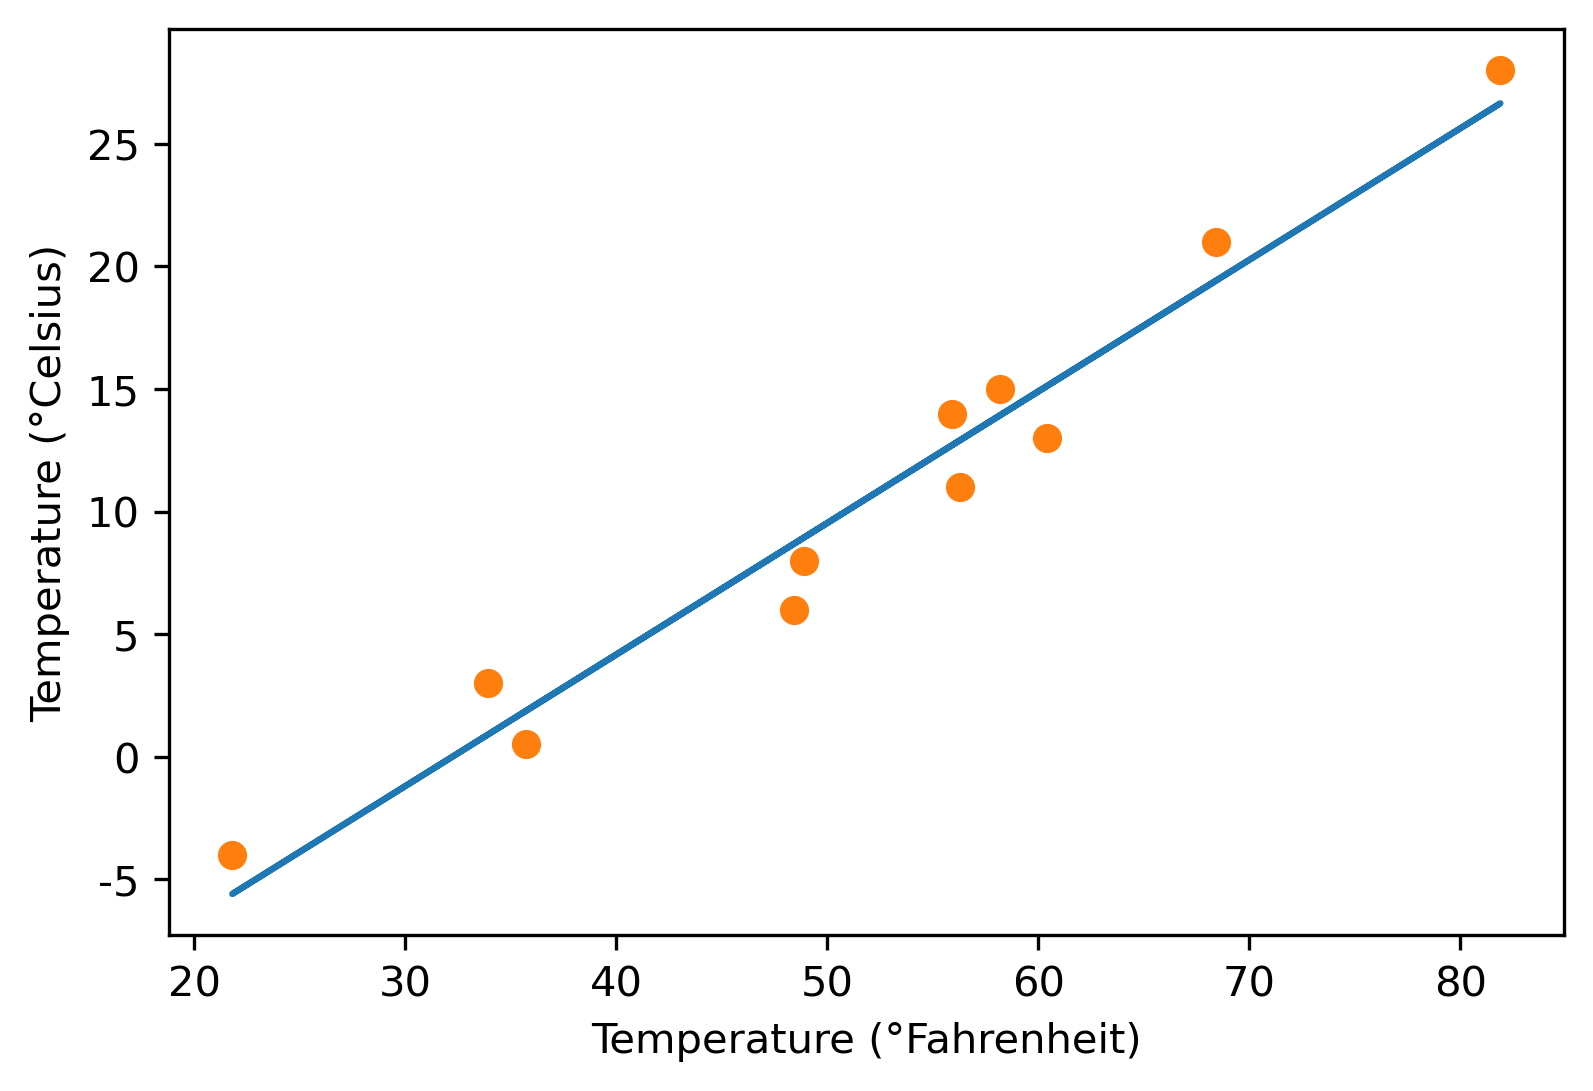

In [18]:
# 可视化
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_un, *params)
fig = plt.figure(dpi=300)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [19]:
# 5.5 PyTorch’s autograd: Backpropagating all things反向传播全过程

#def model(t_u, w, b):
 #   return w * t_u + b

#def loss_fn(t_p, t_c):
 #   squared_diffs = (t_p - t_c)**2
  #  return squared_diffs.mean()


In [20]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
# 查看参数梯度是否为none
params.grad is None

True

In [21]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()

params.grad

tensor([4517.2969,   82.6000])

In [22]:
params.grad is None

False

In [23]:
# 清空参数梯度为接下来反向传播准备
if params.grad is not None:
    params.grad.zero_()

In [24]:
params.grad

tensor([0., 0.])

In [25]:
def training_loop_without_parmas_output(n_epochs, learning_rate, params, t_u, t_c):
    
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c) #forward
        grad = grad_fn(t_u, t_c, t_p, w, b) #backward
        params = params - learning_rate * grad
        print('Epoch %d, Loss %f' % (epoch, float(loss)))
        #print(f'       Params: ',params)
        #print(f'       Grad: ',grad)
    
    return params

In [26]:
training_loop_without_parmas_output(
    n_epochs = 5000,
    learning_rate = 1e-2,
    params = torch.tensor([1.0, 0.0], requires_grad=True),
    t_u = t_un,
    t_c = t_c)

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
Epoch 4, Loss 29.756193
Epoch 5, Loss 29.507153
Epoch 6, Loss 29.392456
Epoch 7, Loss 29.298828
Epoch 8, Loss 29.208717
Epoch 9, Loss 29.119415
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
Epoch 12, Loss 28.853565
Epoch 13, Loss 28.765553
Epoch 14, Loss 28.677851
Epoch 15, Loss 28.590431
Epoch 16, Loss 28.503319
Epoch 17, Loss 28.416498
Epoch 18, Loss 28.329973
Epoch 19, Loss 28.243742
Epoch 20, Loss 28.157804
Epoch 21, Loss 28.072151
Epoch 22, Loss 27.986797
Epoch 23, Loss 27.901728
Epoch 24, Loss 27.816950
Epoch 25, Loss 27.732464
Epoch 26, Loss 27.648256
Epoch 27, Loss 27.564344
Epoch 28, Loss 27.480707
Epoch 29, Loss 27.397362
Epoch 30, Loss 27.314295
Epoch 31, Loss 27.231512
Epoch 32, Loss 27.149010
Epoch 33, Loss 27.066790
Epoch 34, Loss 26.984844
Epoch 35, Loss 26.903175
Epoch 36, Loss 26.821791
Epoch 37, Loss 26.740679
Epoch 38, Loss 26.659838
Epoch 39, Loss 26.579279
Epoch 40, Loss 26.498987
Epoch 41,

Epoch 373, Loss 10.524194
Epoch 374, Loss 10.498409
Epoch 375, Loss 10.472707
Epoch 376, Loss 10.447093
Epoch 377, Loss 10.421569
Epoch 378, Loss 10.396132
Epoch 379, Loss 10.370779
Epoch 380, Loss 10.345510
Epoch 381, Loss 10.320328
Epoch 382, Loss 10.295234
Epoch 383, Loss 10.270224
Epoch 384, Loss 10.245296
Epoch 385, Loss 10.220457
Epoch 386, Loss 10.195701
Epoch 387, Loss 10.171029
Epoch 388, Loss 10.146438
Epoch 389, Loss 10.121935
Epoch 390, Loss 10.097512
Epoch 391, Loss 10.073173
Epoch 392, Loss 10.048919
Epoch 393, Loss 10.024743
Epoch 394, Loss 10.000652
Epoch 395, Loss 9.976640
Epoch 396, Loss 9.952712
Epoch 397, Loss 9.928862
Epoch 398, Loss 9.905093
Epoch 399, Loss 9.881409
Epoch 400, Loss 9.857804
Epoch 401, Loss 9.834277
Epoch 402, Loss 9.810831
Epoch 403, Loss 9.787466
Epoch 404, Loss 9.764176
Epoch 405, Loss 9.740973
Epoch 406, Loss 9.717843
Epoch 407, Loss 9.694793
Epoch 408, Loss 9.671824
Epoch 409, Loss 9.648926
Epoch 410, Loss 9.626110
Epoch 411, Loss 9.603373
Epo

Epoch 868, Loss 4.338911
Epoch 869, Loss 4.334120
Epoch 870, Loss 4.329345
Epoch 871, Loss 4.324588
Epoch 872, Loss 4.319846
Epoch 873, Loss 4.315117
Epoch 874, Loss 4.310409
Epoch 875, Loss 4.305714
Epoch 876, Loss 4.301036
Epoch 877, Loss 4.296376
Epoch 878, Loss 4.291727
Epoch 879, Loss 4.287098
Epoch 880, Loss 4.282482
Epoch 881, Loss 4.277882
Epoch 882, Loss 4.273299
Epoch 883, Loss 4.268732
Epoch 884, Loss 4.264178
Epoch 885, Loss 4.259643
Epoch 886, Loss 4.255120
Epoch 887, Loss 4.250614
Epoch 888, Loss 4.246124
Epoch 889, Loss 4.241648
Epoch 890, Loss 4.237185
Epoch 891, Loss 4.232740
Epoch 892, Loss 4.228308
Epoch 893, Loss 4.223895
Epoch 894, Loss 4.219494
Epoch 895, Loss 4.215109
Epoch 896, Loss 4.210737
Epoch 897, Loss 4.206383
Epoch 898, Loss 4.202043
Epoch 899, Loss 4.197715
Epoch 900, Loss 4.193405
Epoch 901, Loss 4.189108
Epoch 902, Loss 4.184825
Epoch 903, Loss 4.180559
Epoch 904, Loss 4.176305
Epoch 905, Loss 4.172065
Epoch 906, Loss 4.167842
Epoch 907, Loss 4.163630


Epoch 1334, Loss 3.217000
Epoch 1335, Loss 3.216017
Epoch 1336, Loss 3.215038
Epoch 1337, Loss 3.214062
Epoch 1338, Loss 3.213092
Epoch 1339, Loss 3.212122
Epoch 1340, Loss 3.211157
Epoch 1341, Loss 3.210192
Epoch 1342, Loss 3.209235
Epoch 1343, Loss 3.208279
Epoch 1344, Loss 3.207326
Epoch 1345, Loss 3.206376
Epoch 1346, Loss 3.205430
Epoch 1347, Loss 3.204488
Epoch 1348, Loss 3.203547
Epoch 1349, Loss 3.202610
Epoch 1350, Loss 3.201678
Epoch 1351, Loss 3.200747
Epoch 1352, Loss 3.199820
Epoch 1353, Loss 3.198897
Epoch 1354, Loss 3.197976
Epoch 1355, Loss 3.197060
Epoch 1356, Loss 3.196143
Epoch 1357, Loss 3.195231
Epoch 1358, Loss 3.194324
Epoch 1359, Loss 3.193420
Epoch 1360, Loss 3.192517
Epoch 1361, Loss 3.191616
Epoch 1362, Loss 3.190720
Epoch 1363, Loss 3.189829
Epoch 1364, Loss 3.188938
Epoch 1365, Loss 3.188051
Epoch 1366, Loss 3.187166
Epoch 1367, Loss 3.186287
Epoch 1368, Loss 3.185409
Epoch 1369, Loss 3.184534
Epoch 1370, Loss 3.183662
Epoch 1371, Loss 3.182792
Epoch 1372, 

Epoch 1786, Loss 2.989866
Epoch 1787, Loss 2.989655
Epoch 1788, Loss 2.989443
Epoch 1789, Loss 2.989233
Epoch 1790, Loss 2.989025
Epoch 1791, Loss 2.988817
Epoch 1792, Loss 2.988609
Epoch 1793, Loss 2.988401
Epoch 1794, Loss 2.988195
Epoch 1795, Loss 2.987989
Epoch 1796, Loss 2.987785
Epoch 1797, Loss 2.987582
Epoch 1798, Loss 2.987377
Epoch 1799, Loss 2.987174
Epoch 1800, Loss 2.986974
Epoch 1801, Loss 2.986771
Epoch 1802, Loss 2.986570
Epoch 1803, Loss 2.986371
Epoch 1804, Loss 2.986171
Epoch 1805, Loss 2.985972
Epoch 1806, Loss 2.985774
Epoch 1807, Loss 2.985578
Epoch 1808, Loss 2.985381
Epoch 1809, Loss 2.985184
Epoch 1810, Loss 2.984989
Epoch 1811, Loss 2.984793
Epoch 1812, Loss 2.984601
Epoch 1813, Loss 2.984407
Epoch 1814, Loss 2.984215
Epoch 1815, Loss 2.984022
Epoch 1816, Loss 2.983831
Epoch 1817, Loss 2.983639
Epoch 1818, Loss 2.983449
Epoch 1819, Loss 2.983259
Epoch 1820, Loss 2.983073
Epoch 1821, Loss 2.982884
Epoch 1822, Loss 2.982697
Epoch 1823, Loss 2.982510
Epoch 1824, 

Epoch 2323, Loss 2.937665
Epoch 2324, Loss 2.937632
Epoch 2325, Loss 2.937598
Epoch 2326, Loss 2.937565
Epoch 2327, Loss 2.937531
Epoch 2328, Loss 2.937499
Epoch 2329, Loss 2.937465
Epoch 2330, Loss 2.937430
Epoch 2331, Loss 2.937398
Epoch 2332, Loss 2.937364
Epoch 2333, Loss 2.937332
Epoch 2334, Loss 2.937299
Epoch 2335, Loss 2.937265
Epoch 2336, Loss 2.937232
Epoch 2337, Loss 2.937201
Epoch 2338, Loss 2.937167
Epoch 2339, Loss 2.937134
Epoch 2340, Loss 2.937104
Epoch 2341, Loss 2.937071
Epoch 2342, Loss 2.937039
Epoch 2343, Loss 2.937008
Epoch 2344, Loss 2.936976
Epoch 2345, Loss 2.936945
Epoch 2346, Loss 2.936912
Epoch 2347, Loss 2.936883
Epoch 2348, Loss 2.936851
Epoch 2349, Loss 2.936819
Epoch 2350, Loss 2.936788
Epoch 2351, Loss 2.936757
Epoch 2352, Loss 2.936725
Epoch 2353, Loss 2.936694
Epoch 2354, Loss 2.936665
Epoch 2355, Loss 2.936633
Epoch 2356, Loss 2.936602
Epoch 2357, Loss 2.936572
Epoch 2358, Loss 2.936542
Epoch 2359, Loss 2.936511
Epoch 2360, Loss 2.936481
Epoch 2361, 

Epoch 2806, Loss 2.929586
Epoch 2807, Loss 2.929579
Epoch 2808, Loss 2.929572
Epoch 2809, Loss 2.929566
Epoch 2810, Loss 2.929559
Epoch 2811, Loss 2.929551
Epoch 2812, Loss 2.929545
Epoch 2813, Loss 2.929540
Epoch 2814, Loss 2.929533
Epoch 2815, Loss 2.929528
Epoch 2816, Loss 2.929521
Epoch 2817, Loss 2.929513
Epoch 2818, Loss 2.929507
Epoch 2819, Loss 2.929501
Epoch 2820, Loss 2.929496
Epoch 2821, Loss 2.929489
Epoch 2822, Loss 2.929482
Epoch 2823, Loss 2.929476
Epoch 2824, Loss 2.929471
Epoch 2825, Loss 2.929463
Epoch 2826, Loss 2.929458
Epoch 2827, Loss 2.929452
Epoch 2828, Loss 2.929445
Epoch 2829, Loss 2.929439
Epoch 2830, Loss 2.929433
Epoch 2831, Loss 2.929427
Epoch 2832, Loss 2.929421
Epoch 2833, Loss 2.929415
Epoch 2834, Loss 2.929409
Epoch 2835, Loss 2.929404
Epoch 2836, Loss 2.929396
Epoch 2837, Loss 2.929391
Epoch 2838, Loss 2.929383
Epoch 2839, Loss 2.929380
Epoch 2840, Loss 2.929373
Epoch 2841, Loss 2.929368
Epoch 2842, Loss 2.929361
Epoch 2843, Loss 2.929356
Epoch 2844, 

Epoch 3291, Loss 2.928019
Epoch 3292, Loss 2.928018
Epoch 3293, Loss 2.928017
Epoch 3294, Loss 2.928015
Epoch 3295, Loss 2.928013
Epoch 3296, Loss 2.928013
Epoch 3297, Loss 2.928011
Epoch 3298, Loss 2.928009
Epoch 3299, Loss 2.928008
Epoch 3300, Loss 2.928006
Epoch 3301, Loss 2.928007
Epoch 3302, Loss 2.928007
Epoch 3303, Loss 2.928004
Epoch 3304, Loss 2.928002
Epoch 3305, Loss 2.928002
Epoch 3306, Loss 2.928000
Epoch 3307, Loss 2.928000
Epoch 3308, Loss 2.927998
Epoch 3309, Loss 2.927995
Epoch 3310, Loss 2.927995
Epoch 3311, Loss 2.927994
Epoch 3312, Loss 2.927994
Epoch 3313, Loss 2.927991
Epoch 3314, Loss 2.927991
Epoch 3315, Loss 2.927990
Epoch 3316, Loss 2.927989
Epoch 3317, Loss 2.927988
Epoch 3318, Loss 2.927986
Epoch 3319, Loss 2.927985
Epoch 3320, Loss 2.927983
Epoch 3321, Loss 2.927983
Epoch 3322, Loss 2.927981
Epoch 3323, Loss 2.927980
Epoch 3324, Loss 2.927979
Epoch 3325, Loss 2.927979
Epoch 3326, Loss 2.927977
Epoch 3327, Loss 2.927975
Epoch 3328, Loss 2.927973
Epoch 3329, 

Epoch 3779, Loss 2.927717
Epoch 3780, Loss 2.927716
Epoch 3781, Loss 2.927716
Epoch 3782, Loss 2.927717
Epoch 3783, Loss 2.927717
Epoch 3784, Loss 2.927716
Epoch 3785, Loss 2.927715
Epoch 3786, Loss 2.927715
Epoch 3787, Loss 2.927715
Epoch 3788, Loss 2.927715
Epoch 3789, Loss 2.927715
Epoch 3790, Loss 2.927715
Epoch 3791, Loss 2.927714
Epoch 3792, Loss 2.927714
Epoch 3793, Loss 2.927714
Epoch 3794, Loss 2.927714
Epoch 3795, Loss 2.927713
Epoch 3796, Loss 2.927714
Epoch 3797, Loss 2.927713
Epoch 3798, Loss 2.927712
Epoch 3799, Loss 2.927712
Epoch 3800, Loss 2.927713
Epoch 3801, Loss 2.927711
Epoch 3802, Loss 2.927712
Epoch 3803, Loss 2.927712
Epoch 3804, Loss 2.927711
Epoch 3805, Loss 2.927712
Epoch 3806, Loss 2.927711
Epoch 3807, Loss 2.927711
Epoch 3808, Loss 2.927711
Epoch 3809, Loss 2.927709
Epoch 3810, Loss 2.927710
Epoch 3811, Loss 2.927710
Epoch 3812, Loss 2.927708
Epoch 3813, Loss 2.927708
Epoch 3814, Loss 2.927709
Epoch 3815, Loss 2.927709
Epoch 3816, Loss 2.927710
Epoch 3817, 

Epoch 4270, Loss 2.927660
Epoch 4271, Loss 2.927660
Epoch 4272, Loss 2.927660
Epoch 4273, Loss 2.927660
Epoch 4274, Loss 2.927658
Epoch 4275, Loss 2.927659
Epoch 4276, Loss 2.927660
Epoch 4277, Loss 2.927659
Epoch 4278, Loss 2.927659
Epoch 4279, Loss 2.927658
Epoch 4280, Loss 2.927658
Epoch 4281, Loss 2.927659
Epoch 4282, Loss 2.927659
Epoch 4283, Loss 2.927660
Epoch 4284, Loss 2.927660
Epoch 4285, Loss 2.927658
Epoch 4286, Loss 2.927659
Epoch 4287, Loss 2.927658
Epoch 4288, Loss 2.927659
Epoch 4289, Loss 2.927658
Epoch 4290, Loss 2.927657
Epoch 4291, Loss 2.927659
Epoch 4292, Loss 2.927659
Epoch 4293, Loss 2.927659
Epoch 4294, Loss 2.927659
Epoch 4295, Loss 2.927659
Epoch 4296, Loss 2.927657
Epoch 4297, Loss 2.927657
Epoch 4298, Loss 2.927657
Epoch 4299, Loss 2.927658
Epoch 4300, Loss 2.927659
Epoch 4301, Loss 2.927660
Epoch 4302, Loss 2.927657
Epoch 4303, Loss 2.927658
Epoch 4304, Loss 2.927658
Epoch 4305, Loss 2.927658
Epoch 4306, Loss 2.927658
Epoch 4307, Loss 2.927657
Epoch 4308, 

Epoch 4743, Loss 2.927649
Epoch 4744, Loss 2.927648
Epoch 4745, Loss 2.927649
Epoch 4746, Loss 2.927648
Epoch 4747, Loss 2.927649
Epoch 4748, Loss 2.927649
Epoch 4749, Loss 2.927649
Epoch 4750, Loss 2.927650
Epoch 4751, Loss 2.927649
Epoch 4752, Loss 2.927648
Epoch 4753, Loss 2.927647
Epoch 4754, Loss 2.927648
Epoch 4755, Loss 2.927647
Epoch 4756, Loss 2.927649
Epoch 4757, Loss 2.927647
Epoch 4758, Loss 2.927649
Epoch 4759, Loss 2.927648
Epoch 4760, Loss 2.927649
Epoch 4761, Loss 2.927649
Epoch 4762, Loss 2.927648
Epoch 4763, Loss 2.927649
Epoch 4764, Loss 2.927647
Epoch 4765, Loss 2.927649
Epoch 4766, Loss 2.927649
Epoch 4767, Loss 2.927649
Epoch 4768, Loss 2.927649
Epoch 4769, Loss 2.927648
Epoch 4770, Loss 2.927648
Epoch 4771, Loss 2.927648
Epoch 4772, Loss 2.927648
Epoch 4773, Loss 2.927650
Epoch 4774, Loss 2.927649
Epoch 4775, Loss 2.927650
Epoch 4776, Loss 2.927647
Epoch 4777, Loss 2.927648
Epoch 4778, Loss 2.927647
Epoch 4779, Loss 2.927650
Epoch 4780, Loss 2.927649
Epoch 4781, 

tensor([  5.3671, -17.3012], grad_fn=<SubBackward0>)

In [27]:
import torch.optim as optim

# 优化器菜单
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'Optimizer',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_multi_tensor',
 'functional',
 'lr_scheduler',
 'swa_utils']

In [28]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-5
# SGD随机梯度下降
optimizer = optim.SGD([params], lr=learning_rate)

In [29]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c) #正向传播
loss.backward() #反向传播
optimizer.step() #一步更新所有参数

params

tensor([ 9.5483e-01, -8.2600e-04], requires_grad=True)

In [30]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [31]:
def training_loop_2(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    
    return params

In [32]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate2 = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer.zero_grad()
loss.backward()
optimizer.step()

params

tensor([1.7761, 0.1064], requires_grad=True)

In [33]:
training_loop_2(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 7.843369
Epoch 1000, Loss 3.825483
Epoch 1500, Loss 3.091630
Epoch 2000, Loss 2.957596
Epoch 2500, Loss 2.933116
Epoch 3000, Loss 2.928646
Epoch 3500, Loss 2.927829
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012], requires_grad=True)

In [34]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate)

training_loop_2(
    n_epochs = 2000,
    optimizer = optimizer,
    params = params,
    t_u = t_u,
    t_c = t_c)

Epoch 500, Loss 7.612900
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928579
Epoch 2000, Loss 2.927644


tensor([  0.5367, -17.3021], requires_grad=True)

In [35]:
# 5.5.3 SPLITTING A DATASET
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]

val_indices = shuffled_indices[-n_val:]
train_indices, val_indices

# Since these are random, don’t be surprised if your values end up different from here on out.

(tensor([ 5,  7,  3,  9, 10,  0,  2,  6,  1]), tensor([8, 4]))

In [36]:
# 训练集
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]
# 验证集
val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]
#输入标准化处理
train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [37]:
def training_loop_3(n_epochs, optimizer, params, train_t_u, val_t_u,train_t_c, val_t_c):
    
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        optimizer.zero_grad()
        train_loss.backward() #Note that there is no val_loss.backward()here, 
                                #since we don’t want to train themodel on the validation data.
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                    f" Validation loss {val_loss.item():.4f}")
        
    return params

In [38]:
params_temp_1 = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate_temp_1 = 1e-2
optimizer_temp_1 = optim.SGD([params_temp_1], lr=learning_rate_temp_1)

t_p = model(t_un, *params)
loss = loss_fn(t_p, t_c)

optimizer_temp_1.zero_grad()
loss.backward()
optimizer.step()

In [39]:
training_loop_3(
    n_epochs = 3000,
    optimizer = optimizer_temp_1,
    params = params_temp_1,
    train_t_u = train_t_un,
    val_t_u = val_t_un,
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 94.8695, Validation loss 15.0912
Epoch 2, Training loss 41.5927, Validation loss 5.0624
Epoch 3, Training loss 33.5647, Validation loss 12.8680
Epoch 500, Training loss 6.1184, Validation loss 11.9401
Epoch 1000, Training loss 2.6418, Validation loss 9.3247
Epoch 1500, Training loss 2.1846, Validation loss 8.4743
Epoch 2000, Training loss 2.1245, Validation loss 8.1789
Epoch 2500, Training loss 2.1166, Validation loss 8.0734
Epoch 3000, Training loss 2.1155, Validation loss 8.0354


tensor([  5.3613, -16.7575], requires_grad=True)

In [40]:
# Autograd nits and switching it off
def training_loop_4(n_epochs, optimizer, params, train_t_u, val_t_u,train_t_c, val_t_c):
    
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)
    # switch off autograd when we don’tneed it, using the torch.no_grad context manager.
    with torch.no_grad():
        val_t_p = model(val_t_u, *params)
        val_loss = loss_fn(val_t_p, val_t_c)
        assert val_loss.requires_grad == False
        
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

In [41]:
# is_train bool值控制autograd是否使能
def calc_forward(t_u, t_c, is_train):
    with torch.set_grad_enabled(is_train):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)
    return loss